In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv("data.txt", sep='  ', header=None)
data.head()

C:\Users\Vineeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
x = data.iloc[:,:16]
y = data.iloc[:,17]

x = x.drop(columns = [8,11,6,13,0,1])
x = np.array(x)
y = np.array(y)
y =y.reshape(len(y), 1)



In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [5]:
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

def sigmoid(x):
    return 1/(1+ np.exp(-x))

def dsigmoid(x):
    return x*(1-x)

In [6]:
np.random.seed(3) #generates a value between 3
w0 = np.random.random((10,8)) - 1 #between layers 0 and 1
w1 = np.random.random((8,1)) - 1

b0 = np.random.random((1,1)) - 1
b1 = np.random.random((1,1)) - 1


In [7]:
def feed_forward(data_in , w0, w1, b0,b1):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0,w0)+b0)
    layer2 = np.dot(layer1,w1)+b1
    
    return layer0,layer1,layer2

In [8]:
def back_propogation(layer0,layer1,layer2, actual_y, w0,w1,b0,b1,learning_rate, i):
    
    l2_error = layer2 - actual_y
    l2_delta = l2_error
    dh2 = np.dot(layer1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = np.dot(layer0.T, l1_delta)#layer 3 changes
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
   
    b1 = b1 - (learning_rate * np.mean(l2_delta))#we use l2_delta as we get a unit value when differentiation with b is done
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
    if i%1 == 0 and (i!=0):
        loss = np.mean(np.power(layer2 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print('\n', int(i),loss)
    
    return w0,w1,b0,b1
    

In [9]:
epochs = 10000
loss_curve = []
iters = []


In [10]:
for i in range(epochs):
    layer0,layer1,layer2 = feed_forward(xtrain,w0,w1,b0,b1)
    w0,w1,b0,b1 = back_propogation(layer0,layer1,layer2,ytrain, w0,w1,b0,b1,0.001,i)


 1000 0.178321585902101

 2000 0.02415798549851512

 3000 0.003315078224940491

 4000 0.0004971187164861885

 5000 0.00011613080117000267

 6000 6.462126344188695e-05

 7000 5.765717778379062e-05

 8000 5.6715633922353414e-05

 9000 5.6588337262528575e-05


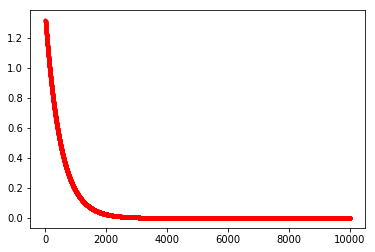

In [11]:
plt.plot(iters,loss_curve,"r.")

In [12]:
layer0,layer1,layer2 = feed_forward(xtest,w0,w1,b0,b1)
loss = np.sqrt(np.mean(np.power(layer2-ytest,2)))
loss


0.007451574646919597

In [13]:
c = feed_forward(xtest[:3],w0,w1,b0,b1)
c

(array([[2.9760877e+04, 2.3068220e+03, 8.7800100e+03, 2.4602000e+02,
         7.7046600e+02, 6.6367700e+02, 2.5180000e+00, 1.3390000e+01,
         3.4203000e+01, 6.7700000e-01],
        [5.1760300e+03, 1.3197270e+03, 6.6455920e+03, 5.9270000e+00,
         6.2310100e+02, 5.7005500e+02, 1.2600000e+00, 6.8810000e+00,
         3.1271000e+01, 2.8600000e-01],
        [2.9760581e+04, 2.3068220e+03, 8.7790020e+03, 2.4601100e+02,
         7.7480100e+02, 6.6481900e+02, 2.5190000e+00, 1.3428000e+01,
         3.4473000e+01, 6.8300000e-01]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[0.98741335],
        [0.98741335],
        [0.98741335]]))

In [14]:
ytest[:3]

array([[0.979],
       [0.98 ],
       [0.976]])